# Preparing the training pipeline for the NiH dataset

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2

import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

from typing import *

In [58]:
tmp_img = cv2.imread('./data/images_original/00000001_000.png')
tmp_greyscale = cv2.imread('./data/images_original/00000001_000.png', cv2.IMREAD_GRAYSCALE)

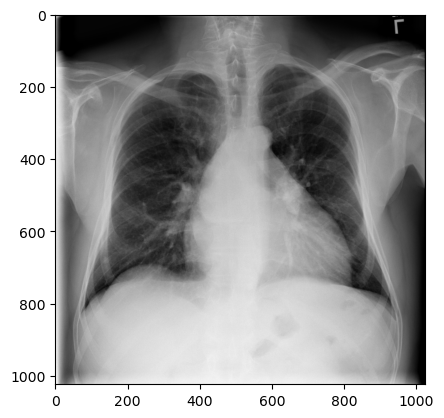

In [59]:
plt.imshow(tmp_img, cmap='gray')
plt.show()

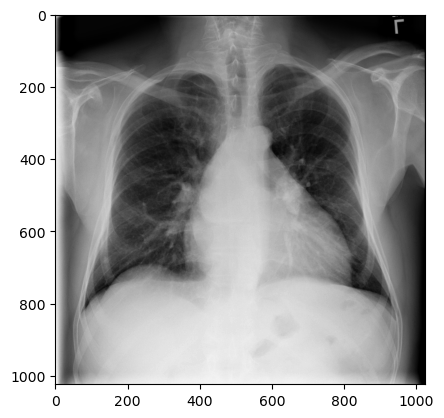

In [60]:
plt.imshow(tmp_greyscale, cmap='gray')
plt.show()

In [2]:
path_to_csv = "./data/Data_Entry_extended.csv"
path_to_test_list = "./data/test_list.txt"
path_to_train_list = './data/train_list.txt'
path_to_val_list = './data/val_list.txt'

In [3]:
label_classes: List[str] = ['No Finding', 'Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']

## Loading the data

In [4]:
def load_metadata(path: str, class_labels: List[str]) -> pd.DataFrame:
    df = pd.read_csv(path)
    df = df[["Image Index"]+class_labels]
    return df

In [5]:
df = load_metadata(path_to_csv, label_classes)

In [6]:
def load_file(file_path: str) -> List[str]:
    with open(file_path, "r") as file:
        lines = [line.rstrip() for line in file]
    return lines

In [7]:
def load_data_splits(data: pd.DataFrame, train_path: str, val_path:str, test_path:str) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    train_split_idxs = load_file(train_path)
    val_split_idx = load_file(val_path)
    test_split_idxs = load_file(test_path)

    df_train = data.loc[data['Image Index'].isin(train_split_idxs)]
    df_val = data.loc[data['Image Index'].isin(val_split_idx)]
    df_test = data.loc[data['Image Index'].isin(test_split_idxs)]

    return df_train, df_val, df_test

In [8]:
train_df, val_df, test_df = load_data_splits(df, path_to_train_list, path_to_val_list, path_to_test_list)

In [9]:
print('Dataset split')
print(f'Length train dataset: {len(train_df)}')
print(f'Length val dataset: {len(val_df)}')
print(f'Length test dataset: {len(test_df)}')
print(f'Combined size: {len(train_df)+ len(val_df) +len(test_df)}')
print(f'Original dataset size: {len(df)}')

Dataset split
Length train dataset: 68918
Length val dataset: 17606
Length test dataset: 25596
Combined size: 112120
Original dataset size: 112120


In [10]:
train_df

,Image Index,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,00000001_000.png,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,00000001_001.png,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,00000001_002.png,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,00000002_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,00000004_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112096,00030786_006.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
112097,00030786_007.png,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
112106,00030793_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
112114,00030801_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Creating labels

In [11]:
def create_labels(df: pd.DataFrame) -> pd.DataFrame:
    labeled_df = df.copy(deep=True)

    multi_category_labels = df[['No Finding', 'Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']].to_numpy().tolist()

    labeled_df["multi_category_labels"] = multi_category_labels

    return labeled_df

In [12]:
train_df = create_labels(train_df)
val_df = create_labels(val_df)
test_df = create_labels(test_df)

In [13]:
train_df

,Image Index,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,multi_category_labels
0,00000001_000.png,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
1,00000001_001.png,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]"
2,00000001_002.png,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]"
3,00000002_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
12,00000004_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112096,00030786_006.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
112097,00030786_007.png,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
112106,00030793_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
112114,00030801_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


## Tensorflow

In [16]:
train_image_directory: str = './data/images_resized/train/'
val_image_directory: str = './data/images_resized/val/'
test_image_directory: str = './data/images_resized/test/'

In [17]:
train_df['Image Index'] = train_image_directory + train_df['Image Index']
val_df['Image Index'] = val_image_directory + val_df['Image Index']
test_df['Image Index'] = test_image_directory + test_df['Image Index']

In [18]:
batch_size: int = 64
image_size: Tuple[int, int] = (224, 224)
image_shape: Tuple[int, int, int] = (224, 224, 3)

In [17]:
x_train_file_name = train_df['Image Index'].values

y_train_no_findings = train_df["No Finding"].values
y_train_multi_labels = np.stack(train_df["multi_category_labels"].values)

In [18]:
x_val_file_name = val_df['Image Index'].values

y_val_no_findings = val_df["No Finding"].values
y_val_multi_labels = np.stack(val_df["multi_category_labels"].values)

In [19]:
x_test_file_name = test_df['Image Index'].values

y_test_no_findings = test_df["No Finding"].values
y_test_multi_labels = np.stack(test_df["multi_category_labels"].values)

In [20]:
def read_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3, dtype=tf.float32)
    return image, label

In [21]:
train_dataset_binary = tf.data.Dataset.from_tensor_slices((x_train_file_name, y_train_no_findings)).map(read_image).batch(batch_size=batch_size)
train_dataset_multi = tf.data.Dataset.from_tensor_slices((x_train_file_name, y_train_multi_labels)).map(read_image).batch(batch_size=batch_size)

val_dataset_binary = tf.data.Dataset.from_tensor_slices((x_val_file_name, y_val_no_findings)).map(read_image).batch(batch_size=batch_size)
val_dataset_multi = tf.data.Dataset.from_tensor_slices((x_val_file_name, y_val_multi_labels)).map(read_image).batch(batch_size=batch_size)

In [22]:
resnet_50_base_model = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                                               weights="imagenet",
                                                               input_shape=image_shape)

In [97]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = resnet_50_base_model(image_batch)
print(feature_batch.shape)

(64, 7, 7, 2048)
(64, 7, 7, 2048)


In [98]:
resnet_50_base_model.trainable = False

In [100]:
resnet_50_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [103]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(64, 2048)


In [105]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(64, 1)


In [23]:
class NiHClassifier(tf.keras.Model):
    def __init__(self, number_of_output_classes: int, image_shape: Tuple[int, int, int] = (224, 224, 3)):
        super().__init__()
        self.image_shape: Tuple[int, int, int] = image_shape
        self.number_of_output_classes: int = number_of_output_classes

        self.pretrained_resnet50 = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                                                         weights="imagenet",
                                                                         input_shape=image_shape)
        self.pretrained_resnet50.trainable = False

        #self.global_average_pooling = tf.keras.layers.GlobalAveragePooling2D()
        self.flatten = tf.keras.layers.Flatten()
        self.prediction_layer = tf.keras.layers.Dense(self.number_of_output_classes, activation=tf.keras.activations.sigmoid)

        self.build(input_shape=(None, image_shape[0], image_shape[1], image_shape[2]))

    def call(self, inputs, training=None, mask=None):
        resnet_features = self.pretrained_resnet50(inputs)
        #avg_pooling_features = self.global_average_pooling(resnet_features)
        predictions = self.prediction_layer(self.flatten(resnet_features))
        return predictions


In [24]:
nih_binary_classifier = NiHClassifier(number_of_output_classes=1)

In [25]:
base_learning_rate = 0.001
nih_binary_classifier.compile(optimizer=tf.keras.optimizers.Adam(base_learning_rate),
                              loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
                              metrics=['accuracy'])

In [26]:
nih_binary_classifier.summary()

Model: "ni_h_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  100353    
                                                                 
Total params: 23,688,065
Trainable params: 100,353
Non-trainable params: 23,587,712
_________________________________________________________________


In [138]:
loss0, accuracy0 = nih_binary_classifier.evaluate(val_dataset_binary)

189/276 [===================>..........] - ETA: 11s - loss: 0.6769 - accuracy: 0.6083

KeyboardInterrupt: 

In [28]:
initial_epochs = 10
history = nih_binary_classifier.fit(train_dataset_binary,
                                    epochs=initial_epochs,
                                    validation_data=val_dataset_binary)

Epoch 1/10
 151/1077 [===>..........................] - ETA: 2:01 - loss: 0.7754 - accuracy: 0.5515


KeyboardInterrupt



## Splitting the data entry csv

In [16]:
df = pd.read_csv('./data/Data_Entry_extended.csv')

In [22]:
train_df

,Image Index,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,multi_category_labels
0,./data/images_resized/train/00000001_000.png,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
1,./data/images_resized/train/00000001_001.png,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]"
3,./data/images_resized/train/00000002_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
12,./data/images_resized/train/00000004_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
14,./data/images_resized/train/00000005_001.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112097,./data/images_resized/train/00030786_007.png,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
112106,./data/images_resized/train/00030793_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
112108,./data/images_resized/train/00030795_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
112114,./data/images_resized/train/00030801_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [14]:
train_split_idxs = load_file(path_to_train_list)
val_split_idx = load_file(path_to_val_list)
test_split_idxs = load_file(path_to_test_list)

In [15]:
train_df

,Image Index,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,multi_category_labels
0,00000001_000.png,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
1,00000001_001.png,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]"
2,00000001_002.png,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]"
3,00000002_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
12,00000004_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112096,00030786_006.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
112097,00030786_007.png,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
112106,00030793_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
112114,00030801_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [16]:
train_df.to_pickle('./data/training_data_extended_4.pkl', protocol=4)
val_df.to_pickle('./data/validation_data_extended_4.pkl', protocol=4)
test_df.to_pickle('./data/test_data_extended_4.pkl', protocol=4)

In [75]:
tmp = pd.read_pickle('./data/training_data_extended.pkl')

In [76]:
(tmp['Image Index'] == '00000011_001.png').sum()

0

In [53]:
np.array(tmp['multi_category_labels'].values[1])

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])